# Exploratory data analysis

In [1]:
###### invite people for the Kaggle party
import numpy as np
import pandas as pd
import kaggle
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('test_clean.csv')

In [3]:
df.head()

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,68.0,11250.0,1.0,7.0,5.0,2001.0,2002.0,162.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3,85.0,11049.0,1.0,8.0,5.0,2007.0,2007.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23,72.0,7226.0,1.0,7.0,5.0,2003.0,2003.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,68.0,9179.0,1.0,7.0,5.0,1999.0,1999.0,158.0,4.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,44,80.0,12984.0,1.0,5.0,6.0,1977.0,1977.0,459.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
df.describe()

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1453.000000,1189.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,...,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,729.066070,70.026913,10523.802768,0.995848,6.098270,5.579239,1971.088581,1984.826298,102.864360,3.394464,...,0.003460,0.082353,0.002076,0.869204,0.069896,0.002768,0.008304,0.013841,0.820761,0.084429
std,421.629227,24.279953,10025.012467,0.064326,1.386032,1.116539,30.251607,20.665376,181.169308,0.574839,...,0.058742,0.274997,0.045533,0.337294,0.255060,0.052559,0.090781,0.116871,0.383685,0.278126
min,1.000000,21.000000,1300.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,364.000000,59.000000,7535.000000,1.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,729.000000,69.000000,9464.000000,1.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1093.000000,80.000000,11616.000000,1.000000,7.000000,6.000000,2000.000000,2004.000000,162.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,313.000000,215245.000000,1.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()
# too many of these are float64 when they should be intergers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Columns: 257 entries, Id to SaleCondition_Partial
dtypes: float64(256), int64(1)
memory usage: 2.8 MB


In [6]:
# These should all be intergers so I need to change them.
df = df.convert_dtypes()
df

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,68,11250,1,7,5,2001,2002,162,4,...,0,0,0,1,0,0,0,0,1,0
1,3,85,11049,1,8,5,2007,2007,0,4,...,0,0,0,1,0,0,0,0,1,0
2,23,72,7226,1,7,5,2003,2003,0,4,...,0,0,0,1,0,0,0,0,1,0
3,33,68,9179,1,7,5,1999,1999,158,4,...,0,0,0,1,1,0,0,0,0,0
4,44,80,12984,1,5,6,1977,1977,459,3,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1069,<NA>,4928,1,6,5,1976,1976,0,3,...,0,0,0,1,0,0,0,0,1,0
1449,1368,75,7950,1,6,6,1977,1977,140,3,...,0,0,0,1,0,0,0,0,1,0
1450,1450,21,1533,1,5,7,1970,1970,0,3,...,0,0,0,1,1,0,0,0,0,0
1451,1161,50,9000,1,5,6,1880,1991,0,3,...,0,0,0,1,1,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Columns: 257 entries, Id to SaleCondition_Partial
dtypes: Float64(2), Int64(255)
memory usage: 3.2 MB


In [8]:
df.dropna(subset=['SalePrice'],inplace=True)

In [9]:
df[df['LotFrontage'].isna()]

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
5,60,<NA>,9947,1,7,5,1990,1991,0,3,...,0,0,0,1,0,0,0,0,1,0
10,259,<NA>,12925,1,6,7,1970,1970,0,3,...,0,0,0,1,0,0,0,0,1,0
19,691,<NA>,12772,1,6,8,1960,1998,0,3,...,0,0,0,1,0,0,0,0,1,0
24,839,<NA>,8795,1,7,5,2000,2000,0,4,...,0,0,0,1,0,0,0,0,1,0
26,984,<NA>,12800,1,7,5,1989,1989,145,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,1400,<NA>,5062,1,7,5,1984,1984,0,4,...,0,0,0,1,0,0,0,0,1,0
1444,1271,<NA>,3072,1,7,5,2004,2004,18,4,...,0,0,0,1,0,0,0,0,1,0
1447,1024,<NA>,19690,1,6,7,1966,1966,0,4,...,0,0,0,1,0,0,1,0,0,0
1448,1069,<NA>,4928,1,6,5,1976,1976,0,3,...,0,0,0,1,0,0,0,0,1,0


In [10]:
df['LotFrontage']=df['LotFrontage'].fillna(0)
df[df.isna()].sum()

Id                       0.0
LotFrontage              0.0
LotArea                  0.0
Street                   0.0
OverallQual              0.0
                        ... 
SaleCondition_AdjLand    0.0
SaleCondition_Alloca     0.0
SaleCondition_Family     0.0
SaleCondition_Normal     0.0
SaleCondition_Partial    0.0
Length: 257, dtype: float64

In [11]:
plt.style.use('bmh')

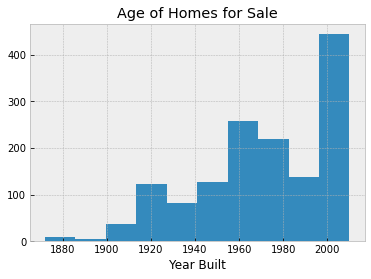

In [12]:
Hist_built=plt.hist(df['YearBuilt'])
Hist_built=plt.xlabel('Year Built')
Hist_built=plt.title('Age of Homes for Sale')
plt.show()

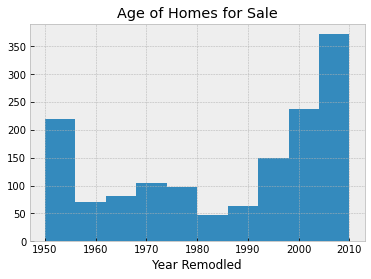

In [13]:
Hist_remod=plt.hist(df['YearRemodAdd'])
Hist_remod=plt.xlabel('Year Remodled')
Hist_remod=plt.title('Age of Homes for Sale')
plt.show()

In [14]:
# huh remodeling wasn't popular in the 1980's  Proably because of the spike in new homes in the 60's-80's?

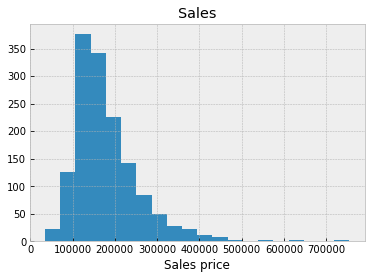

In [15]:
Hist_Sale=plt.hist(df['SalePrice'], bins=20)
Hist_Sale=plt.xlabel('Sales price')
Hist_Sale=plt.title('Sales')
plt.show()

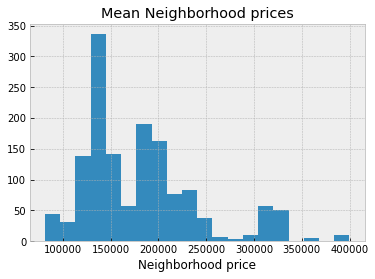

In [16]:
Hist_Neigh=plt.hist(df['Neighborhood_Price'], bins=20)
Hist_Neigh=plt.xlabel('Neighborhood price')
Hist_Neigh=plt.title('Mean Neighborhood prices')
plt.show()

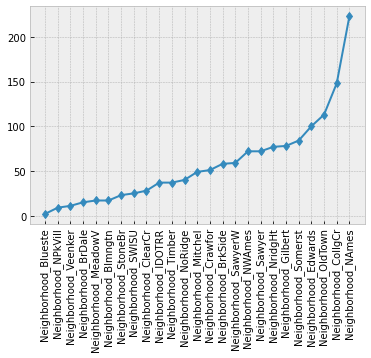

In [17]:
# lets take a look at how many homes were sold in each neighborhood
n=df.filter(like='Neighborhood').drop('Neighborhood_Price',axis=1).sum()
n=n.sort_values()
_= plt.plot(n, marker='d')
_= plt.xticks(rotation=90)
plt.show()

In [18]:
# The most sales are in NAmes and the least are in Blueste.

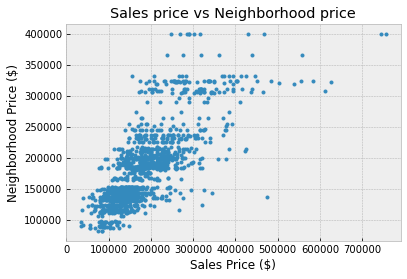

In [19]:
sp=list(df['SalePrice'])
np=list(df['Neighborhood_Price'])
_a = plt.plot(sp,np, linestyle='none',marker='.')
_a = plt.xlabel('Sales Price ($)')
_a = plt.ylabel('Neighborhood Price ($)')
_a = plt.title('Sales price vs Neighborhood price')
plt.show()

TypeError: No loop matching the specified signature and casting was found for ufunc svd_n_s

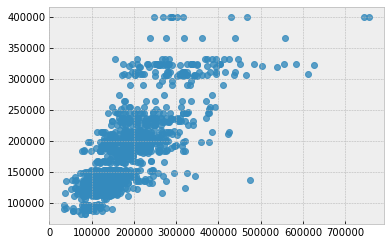

In [20]:
sns.regplot(x="SalePrice", y="Neighborhood_Price", data=df);

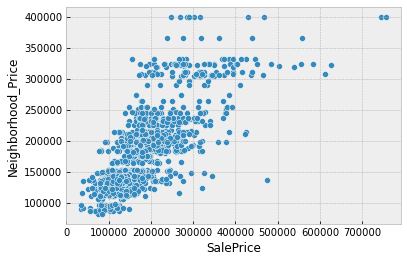

In [21]:
sns.scatterplot(x="SalePrice", y="Neighborhood_Price", data=df);

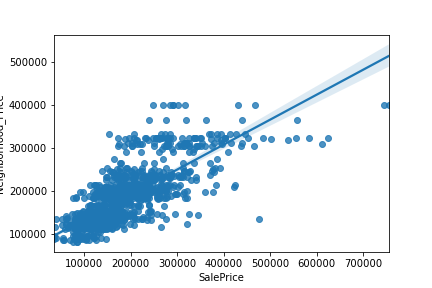

In [22]:
# lets look at the corelation between neighborhood and sales price.
# but to do this we have to put back in the data from the neighborhoods as an object?
# It was easier to do it before I got to this point
from IPython.display import Image

Image("Price_Regression.png")

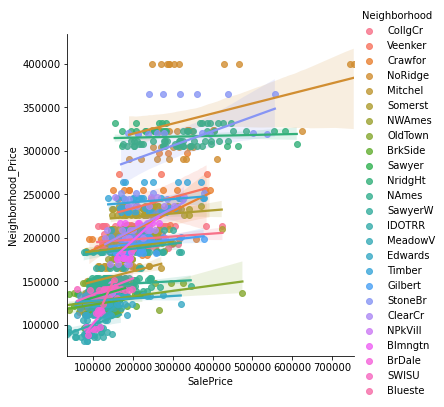

In [23]:
# Strong correlation between neighborhood price and sales price
# What does it look like when we separate out each neigh
Image("Price_By_Hood.png")

In [ ]:
# Looks more complicated than just neighborhood price dictating sales price
# Some of the neighborhoods are completely flat!

In [24]:
df.corr()

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,-0.098341,0.051113,-0.006079,0.037251,-0.030486,-0.001629,0.027500,-0.027591,0.003614,...,0.003706,0.005552,0.002644,-0.022548,0.005408,0.019196,0.049314,0.015690,-0.026805,0.005702
LotFrontage,-0.098341,1.000000,0.101066,-0.025255,0.175491,-0.055149,0.035104,0.076414,0.107896,0.126403,...,-0.011945,0.183033,0.001377,-0.138119,-0.008910,-0.004747,-0.009567,0.028662,-0.132856,0.183427
LotArea,0.051113,0.101066,1.000000,-0.197247,0.106489,-0.005184,0.014621,0.013883,0.105012,0.056224,...,-0.015094,0.020971,-0.005758,-0.002844,-0.029351,-0.013255,0.008910,-0.010873,0.005438,0.023580
Street,-0.006079,-0.025255,-0.197247,1.000000,0.058951,0.043152,0.020830,0.065618,0.017066,0.100511,...,0.003805,0.019344,0.002945,0.006870,0.017701,0.003402,-0.112681,0.007650,-0.002117,0.019609
OverallQual,0.037251,0.175491,0.106489,0.058951,1.000000,-0.092744,0.571981,0.549166,0.408258,0.724890,...,-0.021191,0.325781,-0.058101,-0.224313,-0.103676,-0.041762,-0.045017,-0.025503,-0.140051,0.321586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.019196,-0.004747,-0.013255,0.003402,-0.041762,-0.039143,-0.045452,-0.040363,-0.011743,-0.036167,...,-0.003105,-0.015783,-0.002403,0.020438,-0.014443,1.000000,-0.004821,-0.006242,-0.112743,-0.015999
SaleCondition_Alloca,0.049314,-0.009567,0.008910,-0.112681,-0.045017,-0.033825,-0.009598,-0.020641,-0.013658,-0.049547,...,-0.005392,-0.027414,-0.004174,0.035498,-0.025086,-0.004821,1.000000,-0.010841,-0.195821,-0.027789
SaleCondition_Family,0.015690,0.028662,-0.010873,0.007650,-0.025503,-0.024332,-0.035213,-0.048036,-0.009396,-0.050399,...,-0.006981,-0.035490,-0.005404,0.028388,-0.032476,-0.006242,-0.010841,1.000000,-0.253513,-0.035976
SaleCondition_Normal,-0.026805,-0.132856,0.005438,-0.002117,-0.140051,0.164923,-0.156382,-0.116948,-0.084006,-0.181591,...,0.027537,-0.641053,-0.097605,0.632103,-0.586615,-0.112743,-0.195821,-0.253513,1.000000,-0.649819


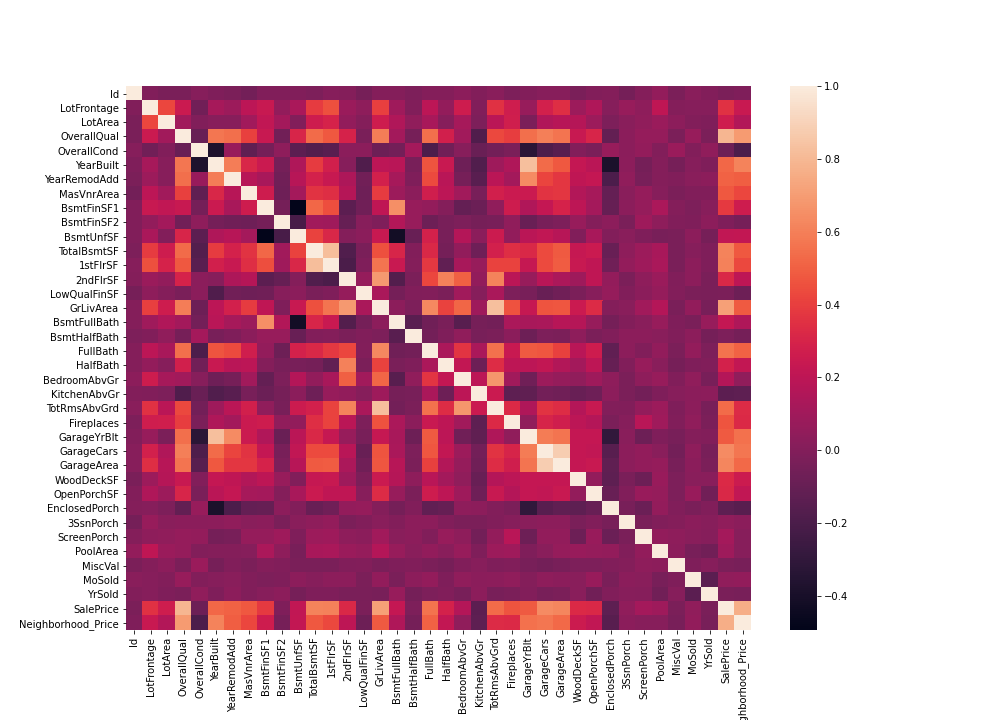

In [25]:
Image("heatmap.png")